In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import imageio
import cv2

# Read in Stanford Dog Images

There are 20580 pictures of dogs.


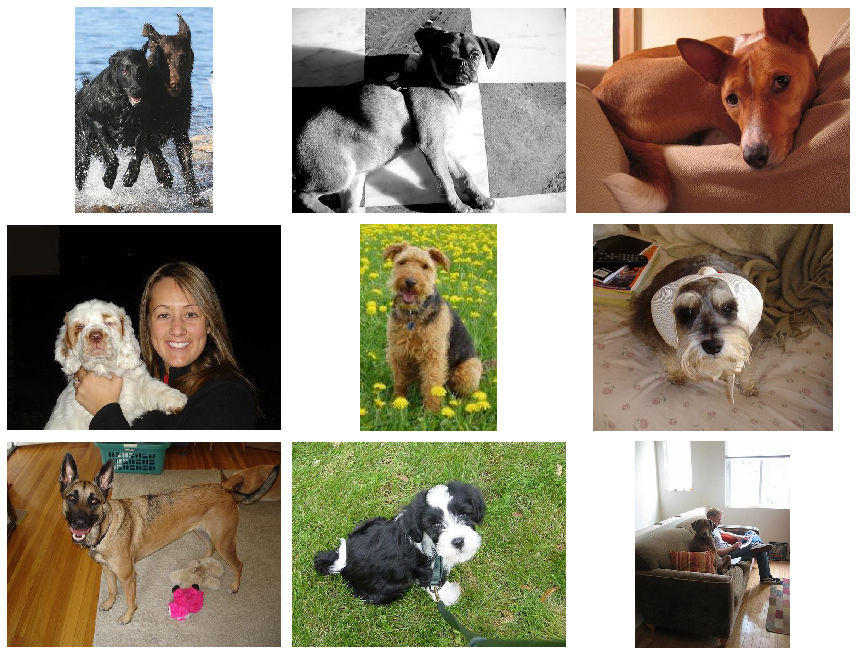

In [8]:
DATA_BASE_PATH = "../data/Images"

# Iterate over the sub directories, of different dog breeds, and add all images to this list
image_files = []
for breed_directory in os.listdir(DATA_BASE_PATH):
    path_breed_directory = os.path.join(DATA_BASE_PATH, breed_directory)
    breed_images = [os.path.join(path_breed_directory, image) for image in os.listdir(path_breed_directory)]
    image_files.extend(breed_images)
    
print(f'There are {len(image_files)} pictures of dogs.')

# Plot 9 random images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))
for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(image_files))
    img = plt.imread(image_files[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Read the jpg files into numpy matrices
images = [imageio.imread(image_file) for image_file in image_files]

# Investigate size and reshape the images

Pixel width, min 100, max 2562
Pixel height, min 97, max 3264
Pixel ratio, mean 0.9123676752511931, median 0.75


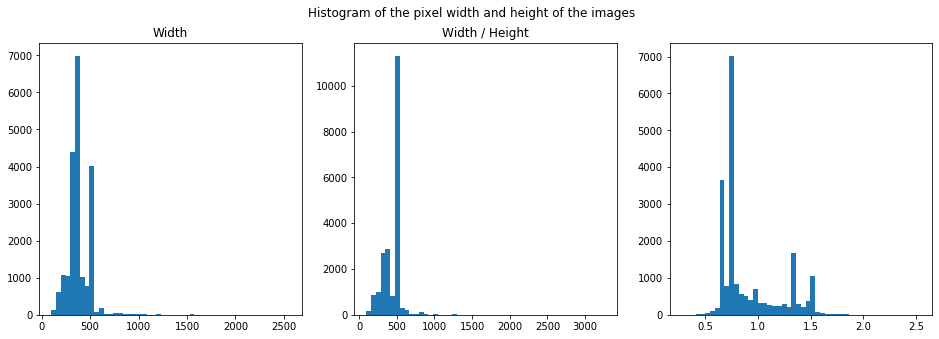

In [9]:
x_shape = [image.shape[0] for image in images]
y_shape = [image.shape[1] for image in images]
x_y_ratio = [float(image.shape[0]) / float(image.shape[1]) for image in images]

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(16,5))
fig.suptitle('Histogram of the pixel width and height of the images')
ax1.set_title('Width')
x_hist = ax1.hist(x_shape, bins=50)
ax2.set_title('Height')
y_hist = ax2.hist(y_shape, bins=50)
ax2.set_title('Width / Height')
x_y_ratio_hist = ax3.hist(x_y_ratio, bins=50)

print(f'Pixel width, min {np.min(x_shape)}, max {np.max(x_shape)}')
print(f'Pixel height, min {np.min(y_shape)}, max {np.max(y_shape)}')
print(f'Pixel ratio, mean {np.mean(x_y_ratio)}, median {np.median(x_y_ratio)}')

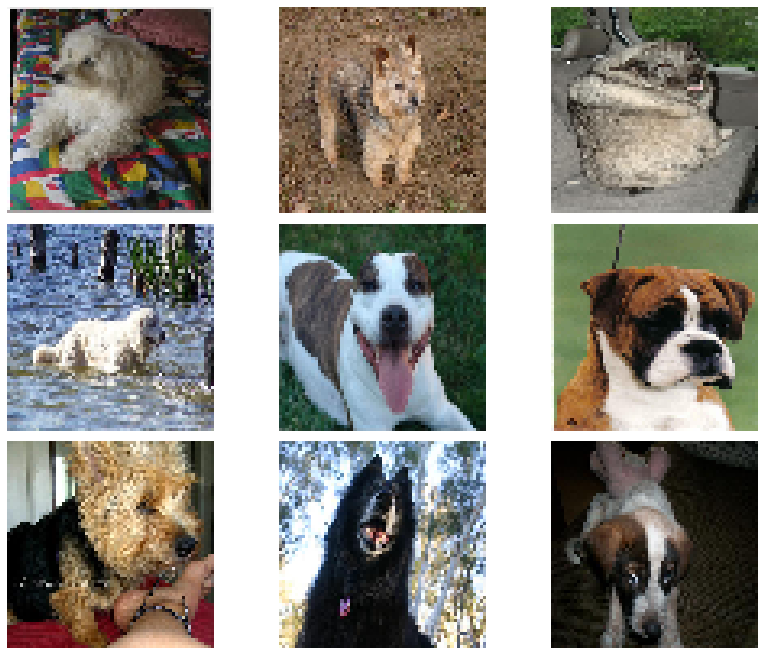

In [10]:
images_reshape = [cv2.resize(image, (64,64), interpolation = cv2.INTER_CUBIC) for image in images]

# Plot 9 random images
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))
for indx, axis in enumerate(axes.flatten()):
    rnd_idx = np.random.randint(0, len(images_reshape))
    imgplot = axis.imshow(images_reshape[rnd_idx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])